# Importing Libraries

In [2]:
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Function to read the canvas Image

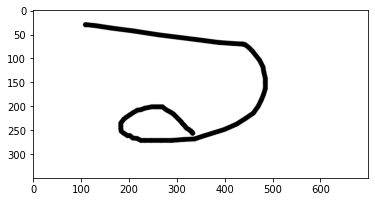

In [3]:
uri = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAArwAAAFeCAYAAABn3sxXAAAAAXNSR0IArs4c6QAAIABJREFUeF7t3QmQFsX5x/EHUEE5BEHBoMDKIQLCQvDMH1mihiWCgEg8ogKiRsGUECueyCEaj4p3BGNQFo2iRAWvCAkJux5IlAirKAgiLKJZ5D4ERIF/PWNesqDL9FzvOz3znaqt5eiZ6f70UPy2357uKrt3794tHAgggAACCCCAAAIIJFSgCoE3oT1LsxBAAAEEEEAAAQQcAQIvDwICCCCAAAIIIIBAogUIvInuXhqHAAIIIIAAAgggQODlGUAAAQQQQAABBBBItACBN9HdS+MQQAABBBBAAAEECLw8AwgggAACCCCAAAKJFiDwJrp7aRwCCCCAAAIIIIAAgZdnAAEEEEAAAQQQQCDRAgTeRHcvjUMAAQQQQAABBBAg8PIMIIAAAggggAACCCRagMCb6O6lcQgggAACCCCAAAIEXp4BBBBAAAEEEEAAgUQLEHgT3b00DgEEEEAAAQQQQIDAyzOAAAIIIIAAAgggkGgBAm+iu5fGIYAAAggggAACCBB4eQYQQAABBBBAAAEEEi1A4E1099I4BBBAAAEEEEAAAQIvzwACCCCAAAIIIIBAogUIvInuXhqHAAIIIIAAAgggQODlGUAAAQQQQAABBBBItACBN9HdS+MQQAABBBBAAAEECLw8AwgggAACCCCAAAKJFiDwJrp7aRwCCCCAAAIIIIAAgZdnAAEEEEAAAQQQQCDRAgRey7r38ccfl+eff162bdsmDRs2lHbt2kn9+vWlsLBQmjVrZllrqC4CCCCAAAIIIBC9AIE3euNQ7vDrX/9axo0bJ7t27XK9XkFBgVMmPz9f6tat63zpr/Xo2rWr6/kUQAABBBBAAAEEkiRA4LWgNy+99FKZOHFiqDXV0WD9yoThzZs3S4MGDaR169ZyxhlnSK1atUK9HxdDAAEEEEAAAQRyJUDgzZW84X1Xr17tTF3YvXu34RnhFDvssMOc6RItW7aUY489Vtq0aSMtWrRwfs2BAAIIIIAAAgjYJEDgjXlvXXXVVfLII4/EppYHHHCAHHPMMU7wrfjVqlUrJ5hzIIAAAggggAACcRMg8MatR/apT7du3aS4uDjmtfyuejVr1pTjjz/eGQnWqRGZ0eEOHTpYUX8qiQACCCCAAALJFCDwxrxfzznnHJk6dWrMa7n/6lWpUkWaNGkiOgq878jw0UcfLfr3HAgggAACCCCAQFQCBN6oZEO67nPPPSf9+/cP6WrxvEzHjh2lefPm8qMf/Uhq164tnTt3li5dujjLrXEggAACCCCAAAJBBQi8QQWzcL5OD/j444+zcKd43UKnSOi0CF1NIi8vz5k7rME48/saNWrEq8LUBgEEEEAAAQRiKUDgjWW3fL9SGviWL19uSW2jr6ZOg2jUqJETgtUmE4gz3xs3bixVq1aNviLcAQEEEEAAAQRiL0DgjX0X/a+Ct956qzz88MOybt06ZwMKDXQHHXSQs5buF198YVFLslNVHQ3OBOJ9gzHTJbLTB9wFAQQQQACBOAgQeOPQCyHWQUeB9WvDhg0yf/5858r6XX+vf15WVhbi3ey9VJ06dSodHdYpE0yXsLdvqTkCCCCAAAL7ChB4U/pMZJY60zBcWloqs2fPlhUrVsj27dtTKvK/Zu87XWLf0WGmS6T+EQEAAQQQQMAyAQKvZR2Wjep++OGHzktyixcvlkWLFjnf9fc6lYLjO4GK0yUOP/xwZ2qJvmDXq1cvtmXmIUEAAQQQQCBmAgTemHVInKuzdu3aPUFYA3Dm65NPPpEdO3bEuepZrVu9evWkffv2e9Yc1m2ZNQxrSOZAAAEEEEAAgewLEHizb57IOy5dulSWLFkiCxYsEA3AmRFiXqb7X3dXr159zy50ugGHLjen3zUQ16pVK5HPBY1CAAEEEEAgDgIE3jj0QoLrsG3bNicEaxjOhGANxPpnzBf+X8c3bNhwTwDO7EangZhR4QT/46BpCCCAAAJZEyDwZo2aG+0rsHLlSicI6zzht956S0pKSmT9+vVOEN65cydgIsKoMI8BAggggAACwQUIvMENuUIEAuXl5bJs2TL59NNP9/quf6ZBmUAszsYbFadGZH6ty6qx6UYEDyWXRAABBBCwVoDAa23XpbviOi1C1xXWucOZ7xqG9UtfrkvzwahwmnuftiOAAAII/JAAgZfnInECW7ZscUaGM6PDFUeK9dc6rzitB6PCae152o0AAgikW4DAm+7+T2XrmS7xw92uq0Xoi3IHH3ywNGnSRE455RTp0qWLs3U1BwIIIIAAAjYLEHht7j3qHolAxekSmdFhnTahI8ZpnC5Ru3ZtZ7UInRusX02bNt3za/09gTiSx5CLIoAAAgiEKEDgDRGTSyVfQKdLZOYNazDWLZnnzJnj7EKX1mXWNPBmwjCBOPn/BmghAgggYKMAgdfGXqPOsRTQ3eYy2zFndqHTJdf015s2bYplnbNRKQJxNpS5BwIIIIDA/gQIvDwfCGRBQHecq7gV84cffuisP6xTJdJ+EIjT/gTQfgQQQCB6AQJv9MbcAYFKBRgVdn84CMTuRpRAAAEEENi/AIGXJwSBmAowKmzWMQRiMydKIYAAAmkWIPCmufdpu5UCjAp76zYCsTcvSiOAAAJJFCDwJrFXaVNqBXRUOPPinK4iwVxh90eBQOxuRAkEEEDAdgECr+09SP0RMBSYN2+eaAjOvDy3ZMkS+eCDD2Tr1q2GV0hnMQJxOvudViOAQLIECLzJ6k9ag4BngYqjwrNmzXLWFV6/fr18/fXXotMnOPYvsG8g1t8feOCBcvzxx8upp54q9evXhxABBBBAIMcCBN4cdwC3RyDOAhs2bHCWTst8lZWV7fV7/XuO/QvUqFHD2bJZN+XIy8uTY445Zs/Odfp7/XsOBBBAAIFoBQi80fpydQQSLUAgDta9VapUkUaNGjkhWMNvJhBnvjdu3FiqVq0a7CacjQACCCAgBF4eAgQQiEyAQByctnnz5nsC8b7BmOkSwX25AgIIpEOAwJuOfqaVCMRSgEAcrFvq1KlT6eiwTqFgukQwX85GAIHkCBB4k9OXtASBxAkQiP136b7TJfYdHWa6hH9bzkQAAfsECLz29Rk1RgCB/woQiIM9ChWnS+hocL169Zx5xDo63KFDB9EVJzgQQACBJAgQeJPQi7QBAQR+UIBAHM6DocE3Pz9/z8X015kwvO/fEZTDMecqCCAQrgCBN1xProYAAhYJEIij7az9BeVdu3Y5axQ3bNjQWani0EMP3StUR1szro4AAmkTIPCmrcdpLwIIGAsQiI2pQi+4b1je9/cbN250AvPhhx8uRxxxhHN/3UVw3bp10qJFC7n88stDrxMXRAABewUIvPb2HTVHAIEcC+wbiN955x2ZPXu2s1Odbtn87bff5riG6b19tWrVpKCgQH72s585IVhf2rviiivSC0LLEUi5AIE35Q8AzUcAgegEysvLZdmyZfLpp5/u9V3/bOXKlbJz587obs6Vvyegm3gMGTJEHnroIXQQQCBlAgTelHU4zUUAgfgIfPLJJ85WzUuXLt3zXcOwfq1duzY+FU1YTbp37y7Tp09PWKtoDgII7E+AwMvzgQACCMRQYMuWLc7IcGZ0uOJIsf5627ZtMay1PVXq1KmTTJ48WVq1amVPpakpAgj4FiDw+qbjRAQQQCB3AkyXCG6vUxxuuukmGTt2bPCLcQUEEIi1AIE31t1D5RBAAAF/AhWnS2RGh3X6hI4YM11ib9NevXrJSy+95A+asxBAwAoBAq8V3UQlEUAAgfAEdLpEZt6wBuO5c+fKv//9b1mzZo3ojmu63NeCBQvCu6EFV+rZs6c8+eST7C5nQV9RRQT8CBB4/ahxDgIIIJAiAR0Z1q/MUVxcvOfX+/5dSUmJtTJt2rSRp556ig0wrO1BKo5A5QIEXp4OBBBAAIFIBCoLyjr/eM6cOVJWVubssKabSuiaxvr7XB86r3fMmDEyYsSIXFeF+yOAQIgCBN4QMbkUAggggEA4AvuG5Yq/X7JkiTMFQ+ciN2jQwPnSTT7mzZsnX3/9dSgVuP766+XOO+8M5VpcBAEEci9A4M19H1ADBBBAAIGQBG699VaZMmWKE4Z37Njh7LLm95g4caIMHDjQ7+mchwACMRIg8MaoM6gKAggggEC4AjrfuHfv3rJp0yZfFyb0+mLjJARiJ0DgjV2XUCEEEEAAgTAFNm/eLB06dHB2sPNzEHr9qHEOAvESIPDGqz+oDQIIIIBARAIXXnihs7uan4PQ60eNcxCIjwCBNz59QU0QQAABBCIWmDZtmlxyySWio75eD0KvVzHKIxAfAQJvfPqCmiCAAAIIZEFg/vz5UlhYKKtWrfJ8N12ybOTIkZ7P4wQEEMitAIE3t/7cHQEEEEAgBwK67m/z5s19reLAkmU56DBuiUBAAQJvQEBORwABBBCwU0BDb+fOnZ1tlr0cujmFrv7QpUsXL6dRFgEEcihA4M0hPrdGAAEEEMitgIbegoICKS0t9VSRRo0aycKFC51d4jgQQCD+AgTe+PcRNUQAAQQQiFDAb+jt06ePTJ06NcKacWkEEAhLgMAbliTXQQABBBCwVsBv6B01apSMHj3a2nZTcQTSIkDgTUtP004EEEAAgf0KaOg99dRTnakKXg4d5dXRXg4EEIivAIE3vn1DzRBAAAEEsiygobdly5ayZs0a4zvrPN5Zs2ZJfn6+8TkURACB7AoQeLPrzd0QQAABBGIuUFZW5qze4CX0atjV0MtLbDHvXKqXWgECb2q7noYjgAACCFQmsHz5cmnXrp189dVXxkgDBw4U3Y2NAwEE4idA4I1fn1AjBBBAAIEYCOg2xH379vVUk/vuu0+GDRvm6RwKI4BA9AIE3uiNuQMCCCCAgKUCugKDbifs5dCpDbq2LwcCCMRHgMAbn76gJggggAACMRTQFRhefPFF45rpPN558+ZJs2bNjM+hIAIIRCtA4I3Wl6sjgAACCFgu4GeNXn2JTUMvBwIIxEOAwBuPfqAWCCCAAAIxFpg/f74zTWHjxo3GteQlNmMqCiIQuQCBN3JiboAAAgggkASBoqIiGTRokKem6KoNGnw5EEAgtwIE3tz6c3cEEEAAAYsEdAWGBx54wFONdWoDm1J4IqMwAqELEHhDJ+WCCCCAAAJJFtCpDSUlJcZN1JfYli1bxqYUxmIURCB8AQJv+KZcEQEEEEAgwQL6EpuO2OqObKaHhmRdrowDAQRyI0DgzY07d0UAAQQQsFhAX2Lr2LGjpxb069dPnnvuOU/nUBgBBMIRIPCG48hVEEAAAQRSJuDnJbaxY8fKiBEjUiZFcxHIvQCBN/d9QA0QQAABBCwV0BUYJk2aZFz7qlWrytq1a5nPayxGQQTCESDwhuPIVRBAAAEEUiqg83lLS0uNWz9gwADR0WEOBBDIngCBN3vW3AkBBBBAIIEC+hKbbiNsuilFjRo15D//+Q+jvAl8FmhSfAUIvPHtG2qGAAIIIGCJQHFxsXTr1s24tqNGjZLRo0cbl6cgAggEEyDwBvPjbAQQQAABBByBkSNHir6UZnKwNq+JEmUQCE+AwBueJVdCAAEEEEi5QIsWLWTp0qVGCozyGjFRCIFQBAi8oTByEQQQQAABBESWL18ueXl5RhSM8hoxUQiBUAQIvKEwchEEEEAAAQS+E/CyVBmjvDw1CGRHgMCbHWfuggACCCCQEgFGeVPS0TTTKgECr1XdRWURQAABBGwQYJTXhl6ijmkSIPCmqbdpKwIIIIBAVgQY5c0KMzdBwFiAwGtMRUEEEEAAAQTMBRjlNbeiJAJRCxB4oxbm+ggggAACqRTwMspbs2ZNWblyJbuvpfJJodHZECDwZkOZeyCAAAIIpFLAyyjvgAEDpKioKJVONBqBqAUIvFELc30EEEAAgdQKeBnlrVq1quzcuTO1VjQcgSgFCLxR6nJtBBBAAIHUC3gZ5dWtiUeMGJF6MwAQCFuAwBu2KNdDAAEEEECggoCXUd6uXbtKcXExfgggELIAgTdkUC6HAAIIIIDAvgInnniivPvuu64wbdu2lQULFriWowACCHgTIPB686I0AggggAACngWeeeYZueCCC1zPq1OnjmzcuNG1HAUQQMCbAIHXmxelEUAAAQQQ8CywYcMGqVevntF569evZ3kyIykKIWAuQOA1t6IkAggggAACvgWaNWsmZWVlrufPmjVLCgoKXMtRAAEEzAUIvOZWlEQAAQQQQMC3gIbYkpIS1/NHjRolo0ePdi1HAQQQMBcg8JpbURIBBBBAAAHfAhpix4wZ43o+G1C4ElEAAc8CBF7PZJyAAAIIIICAd4Fp06ZJ3759XU/Mz8+XefPmuZajAAIImAsQeM2tKIkAAggggIBvgfnz50vHjh2Nzt+9e7dROQohgICZAIHXzIlSCCCAAAIIBBaoUqWK0TV0hFdHejkQQCAcAQJvOI5cBQEEEEAAAVeBdu3ayYcffuhabvDgwTJhwgTXchRAAAEzAQKvmROlEEAAAQQQCCygo7alpaWu1znppJNkzpw5ruUogAACZgIEXjMnSiGAAAIIIBBYQF9a05fX3I7GjRvLypUr3Yrx9wggYChA4DWEohgCCCCAAAJBBV555RXp1auX0WXYcc2IiUIIGAkQeI2YKIQAAggggEA4AqYvrrHjWjjeXAUBFSDw8hwggAACCCCQRQF2XMsiNrdC4L8CBF4eBQQQQAABBLIoYLrjWteuXaW4uDiLNeNWCCRXgMCb3L6lZQgggAACMRQw3XFNq84GFDHsQKpkpQCB18puo9IIIIAAArYKbNiwQerVq2dUfTagMGKiEAKuAgReVyIKIIAAAgggEK6A6Xq89913nwwbNizcm3M1BFIoQOBNYafTZAQQQACB3AoMHDhQJk2a5FqJ3r17G63b63ohCiCQcgECb8ofAJqPAAIIIJB9gaKiIhk0aJDrjRs0aCCrV692LUcBBBDYvwCBlycEAQQQQACBLAssX75c8vLyjO760UcfyXHHHWdUlkIIIPDDAgRengwEEEAAAQRyIFCzZk3ZunWr6511Dq/O5eVAAAH/AgRe/3aciQACCCCAgG8BHbVdtGiR6/m6UYXuusaBAAL+BQi8/u04EwEEEEAAAd8ChYWFMmPGDNfzu3fvLtOnT3ctRwEEEKhcgMDL04EAAggggEAOBIYPHy7333+/651vuOEGueOOO1zLUQABBAi8PAMIIIAAAgjESmDMmDGi2wy7HVpm1KhRbsX4ewQQ2I8AI7w8HggggAACCORAgMCbA3RumVoBAm9qu56GI4AAAgjkUoDAm0t97p02AQJv2nqc9iKAAAIIxEJgxIgRcvvtt7vW5eabb5bbbrvNtRwFEECgcgECL08HAggggAACORDo16+fvPDCC653Puecc+T55593LUcBBBAg8PIMIIAAAgggECuBbt26SXFxsWudWIfXlYgCCLgKMMLrSkQBBBBAAAEEwhfo0aOH0fq6ul7va6+9Fn4FuCICKRIg8Kaos2kqAggggEB8BIYMGSLjx493rdBVV10l48aNcy1HAQQQqFyAwMvTgQACCCCAQA4EWKUhB+jcMrUCBN7Udj0NRwABBBDIpQCBN5f63DttAgTetPU47UUAAQQQiIUAgTcW3UAlUiJA4E1JR9NMBBBAAIF4CRB449Uf1CbZAgTeZPcvrUMAAQQQiKkAgTemHUO1EilA4E1kt9IoBBBAAIG4CxB4495D1C9JAgTeJPUmbUEAAQQQsEaAwGtNV1HRBAgQeBPQiTQBAQQQQMA+AQKvfX1Gje0VIPDa23fUHAEEEEDAYgECr8WdR9WtEyDwWtdlVBgBBBBAIAkCffv2lWnTprk25fzzz5fJkye7lqMAAghULkDg5elAAAEEEEAgBwLHHXecLFq0yPXOBQUFMmvWLNdyFEAAAQIvzwACCCCAAAKxEjj44INl+/btrnUaPHiwTJgwwbUcBRBAgMDLM4AAAggggEBsBHQqg05pMDmmTJki/fv3NylKGQQQqESAKQ08GggggAACCGRZYODAgTJp0iTXu9aqVUs2b97sWo4CCCCwfwECL08IAggggAACWRZo1qyZlJWVud71mmuukfvvv9+1HAUQQIDAyzOAAAIIIIBAbATmz58vHTt2NKqPvqymL61xIIBAMAFGeIP5cTYCCCCAAAKeBIYNGyYPPPCA6zmHHnqobNiwwbUcBRBAwF2AwOtuRAkEEEAAAQRCE8jPz5fS0lLX6w0YMECKiopcy1EAAQTcBQi87kaUQAABBBBAIBSB5cuXS15entG1pk6dKn369DEqSyEEENi/AIGXJwQBBBBAAIEsCegLaMOHDze62/r166Vu3bpGZSmEAAIEXp4BBBBAAAEEYiFgOp2hd+/eRtsOx6JRVAIBCwQY4bWgk6giAggggID9AroMmS5HZnJMnDhRdK1eDgQQCEeAwBuOI1dBAAEEEEBgvwJXX321PPzww0ZKy5YtMw7HRhekEAIpFyDwpvwBoPkIIIAAAtkR0Pm4GzdudL1Zw4YNpby83LUcBRBAwFyAwGtuRUkEEEAAAQR8CRQXF0u3bt2Mzr300kvlscceMypLIQQQMBMg8Jo5UQoBBBBAAAHfArq82Isvvmh0/htvvCH/93//Z1SWQgggYCZA4DVzohQCCCCAAAK+BLysvdu4cWNZuXKlr/twEgIIVC5A4OXpQAABBBBAIEKB0aNHy5gxY4zuwOoMRkwUQsCzAIHXMxknIIAAAgggYC5g+rJa06ZNRUeDORBAIHwBAm/4plwRAQQQQAABR6CoqEgGDRpkpDFq1CjR0WAOBBAIX4DAG74pV0QAAQQQQMARKCgokJKSEiMN1t41YqIQAr4ECLy+2DgJAQQQQACB/QvMnz9fOnbsaMQ0YMAAZzSYAwEEohEg8EbjylURQAABBFIuUFhYKDNmzDBSmDVrljMazIEAAtEIEHijceWqCCCAAAIpFigrK5O8vDzZvXu3qwIvq7kSUQCBwAIE3sCEXAABBBBAAIG9BQYOHCiTJk0yYmEpMiMmCiEQSIDAG4iPkxFAAAEEENhbYMOGDXLkkUfK9u3bXWmqV68u5eXlokuXcSCAQHQCBN7obLkyAggggEAKBbxsNPGTn/xE3nzzzRQq0WQEsitA4M2uN3dDAAEEEEiwgI7u6txd/W5ylJaWSvv27U2KUgYBBAIIEHgD4HEqAggggAACFQW8jO526NBBdOkyDgQQiF6AwBu9MXdAAAEEEEiBgNfRXTaaSMFDQRNjI0DgjU1XUBEEEEAAAZsFvIzustGEzT1N3W0UIPDa2GvUGQEEEEAgVgKM7saqO6gMAt8TIPDyUCCAAAIIIBBQgNHdgICcjkDEAgTeiIG5PAK5Ehg/frysW7fOuX3btm33qsbixYtl/fr1cthhh0nLli2dvzP9sy+//FJWr14tTZo0kYsvvjhXzeO+CMRGQEd3GzduLFu3bjWqE3N3jZgohECoAgTeUDm5GAK5ESguLhZd3kjf+J41a5botqbZOA488EC5/vrrZezYsdm4HfdAIJYCvXv3lpdeesmobszdNWKiEAKhCxB4QyflgghEK1Ax3GrAjcOyRvof/rRp06JtOFdHIIYCCxculDZt2hjXjNFdYyoKIhCqAIE3VE4uhkC4Ak888YRowF21apV88cUXsQi3lbXwoosukoceeogtUsN9BLhazAV004gPPvjAqJaM7hoxUQiBSAQIvJGwclEE/AssWLBAxowZ43xEumPHDv8XysGZ+fn5zpSKunXr5uDu3BKB7AqMHDnS03QeRnez2z/cDYGKAgRengcEYiCwadMmefrpp2Xy5Mny+uuvx6BG/qtQq1YteeONN0TDLwcCSRWYMWOGFBYWGjevc+fO8u677xqXpyACCIQrQOAN15OrIWAsoCsdPPnkk85IrgbEXbt2GZ8b94JVq1aVoUOHyoMPPhj3qlI/BDwLfPXVV84PdJ988onxuS+//LL07NnTuDwFEUAgXAECb7ieXA2B7wloqF20aJGsWbNGtmzZ4vwn+dFHHzm/TvqhoWDq1KnSrFmzpDeV9qVIYODAgTJp0iTjFnfs2FHee+894/IURACB8AUIvOGbckUEHIErrrhCJk6cKN9++23qRQYPHiy///3vmdub+ifBfoAJEybI5ZdfbtyQevXqOS+c1qhRw/gcCiKAQPgCBN7wTbliygV0VYVLLrlEPvvss5RL7N38Aw44QK677jq5/fbbcUHASgFdgkw/tfDyMunMmTPl9NNPt7K9VBqBJAkQeJPUm7QlpwLLly+XQYMGOcuIxeVo0KCBHHroodK8eXM55JBDnGrpEmfl5eWyfft2Z9SpUaNGzp+b/JnusrZ06dJAzatfv77zA8G9994b6DqcjEC2BTS4/vOf/zS+ra62ois5cCCAQO4FCLy57wNqYLmAbis6fPhwKSoqymlLunbt6ow+VfyKokLaTg32QQ/dpe3qq68m+AaF5PysCHhdguzMM8+Uv/3tb1mpGzdBAAF3AQKvuxElEPhBAQ261157rTz77LOib21n88hWuK2sTbq722mnnSabN28O3OxWrVqJLvHEi22BKblARAJelyDTT1P030jLli0jqhGXRQABrwIEXq9ilEdARO644w655ZZbZOfOnVnxaN26tfTo0cOZChCX9W11CscJJ5zgrD4RxnHppZfKPffcw4ttYWByjdAE/CxB9vjjj4fyKUhojeBCCCAgBF4eAgQ8CKxdu1b69+/v7CYW9aEjqBdccIFceOGFUqdOnahv5+v6OsqtC+oHndebubmu36svtd1www2+6sNJCIQt8NOf/tTTv3ddkURXcuBAAIF4CRB449Uf1CbGAroTmk5h0Je7ojpq1qwp11xzjRN027VrF9VtQr/ubbfd5iw7tnHjxlCu3bt3b5k2bVoo1+IiCPgR0B/mNOzOmzfP+HT9JEbLswSZMRkFEci3XWI2AAAXR0lEQVSaAIE3a9TcyFYBHdW9+OKL5bXXXgu9CbVr15bq1as7KyX069dPRo8eHfo9snVBDQj333+/6JvpYRwnn3yys7i/zvHlQCCbArrSyoABA2TFihWebssSZJ64KIxAVgUIvFnl5ma2CegqAuPHjw9l218NtxdddJF0795dWrRo4Xxp2E3aoXN7TzrpJNElzIIeOsXhpptukrFjxwa9FOcj4CqgP7TpD2z6g5vXgyXIvIpRHoHsChB4s+vN3SwR0FHdXr16ydtvvx24xroOrv4HqtuRpunQF/seffRR0QAc9FA73bWOA4GoBHRVhb59+/p6XlmCLKpe4boIhCdA4A3PkislREDn6v7mN79xNmgIcmjQHTZsmPNVt27dIJey+tyXX37Z2WY56NzncePGyVVXXWW1BZWPp4BOJfI7Feeggw6SBQsWsARZPLuWWiGwR4DAy8OAwH8FdFRXX0rTeaNBD53/p/+Jsrbs/yR1GbcHHngg0Nq9OsqbtpHyoM8i51cuoKO6uomKfvd7/OEPf5ChQ4f6PZ3zEEAgSwIE3ixBc5t4C4S1AsPhhx/u7K4Ul7Vy46YexotthN649aqd9dFpRrpDYpCjbdu2zuguBwIIxF+AwBv/PqKGEQqEtQKDvnymy4ndddddEdY2OZcO+mLb9ddfL3feeWdyQGhJ1gT02dNRXV2JIcihn94sW7YsyCU4FwEEsihA4M0iNreKl4CuwPDwww8HrtQvfvELZ4ewo446KvC10naBIUOGOKtg+DkIvX7U0n1OZtk8/aTB76FzdvW5ve+++/xegvMQQCAHAgTeHKBzy9wL9OzZU1599dVAFdH/+DSs6Za4HP4FdKTt3HPPFR1t93roDywaPjgQ2J+ABlxddeXNN98MBNW1a1cpKipibn4gRU5GIDcCBN7cuHPXHAls2bLF2UQi6C5eRx99tMyePZtR3ZD6cfPmzdKkSRPxM/LGnN6QOiGhl7nxxhvl7rvvDrSWtq64oi+h6oorHAggYKcAgdfOfqPWPgTmzp0r5513nnz66ac+zv7uFB3VvfLKK53VBjjCFdCw26lTJ1/zIpneEG5fJOFqOle3R48esmjRokDN6dChgzOqy4uogRg5GYGcCxB4c94FVCAbArp+6x//+EfZvXu379sxV9c3nfGJGnoLCgqktLTU+JxMQUKvZ7LEnqA/kOqIrJ9PDCqijBo1yurtvhPbwTQMAR8CBF4faJxil4Cu2xpkbV39OPPee+9lrm6Wul1DyqmnnioLFy70fEfm9HomS9QJYayrqyCM6ibqsaAxCDgCBF4ehEQL6EsqXbp08d1GRnV90wU6UUNv69atfe12x5zeQPRWnqzPi+6UpqswBD10eUEdHU7z7ohBDTkfgTgKEHjj2CvUKTSB5s2b+5qzywoMoXWB7wtpiGnZsqWsWbPG8zUIvZ7JrD1BV/nQdXV1zm6Qo2nTps5cXZ1Sw4EAAskTIPAmr09p0X8F/K7xqqsFvPXWW6zAEIMnSUNv586dZenSpZ5rQ+j1TGbVCfpsaNANuuKKNlq3AtfRYUZ1rXoEqCwCngQIvJ64KGyLwGOPPSaXXXaZ5+r+8pe/lD//+c+ez+OE6ASCzOm9/PLL5dFHH42uclw5JwJhvZSmOyQ+88wz0qdPn5y0g5sigED2BAi82bPmTlkS0BdXdFRw586dxnfU//ieeOIJ0Tm7HPETCDKn97e//a2zDiuH/QJhbQusErqW9vvvv8+orv2PBS1AwEiAwGvERCGbBE466SR55513jKtcv359+cc//uG8mc0RXwG/c3qrVKki+kNQ+/bt49s4auYqoC+l6ctkQQ/94XbEiBHOFwcCCKRHgMCbnr5ORUvPPPNMmTlzpnFb69WrJytXrpRDDjnE+BwK5k7A75xeDbt+1vbNXUu5c0YgrJfS9HqswMBzhUB6BQi86e37xLVcX2DRt6y9HP/617/kxBNP9HIKZXMs4HdzCn0xyevzkeOmpvr22s9XX321PPXUU4Ed9NMbfSmNFRgCU3IBBKwVIPBa23VUvKJAeXm5HHnkkZ5Qxo0bJ7oDG4d9An5D7/Dhw51NRDjiK6B9+7vf/U7uuece2bVrV+CKsltaYEIugEAiBAi8iehGGnHFFVfIn/70J2OIwYMHy4QJE4zLUzB+AhqMdL724sWLPVWOLYg9cWWtsL6QpvN0p0yZIlu3bg18365duzoj+s2aNQt8LS6AAAL2CxB47e9DWiDifFRZUlJiZJGfny9z586VatWqGZWnUHwFNPTq5iLr1q3zVEm2IPbEFWlhnaOry4yFsZ6uVlS3AtfpC7qlOAcCCCCQESDw8iwkQqBHjx4yffp0o7Ywb9eIyZpCK1askGOPPVa2b9/uqc6s0euJK/TCkyZNcoKprqAR1tG7d29nVJcNJMIS5ToIJEeAwJucvkx1S3Qu7iOPPOJqcNZZZ8krr7ziWo4CdgnofOyhQ4d6rjRr9HomC3SCjsjraK4GXf11WAfbAoclyXUQSK4AgTe5fZuqlpmu0anreOpLLBzJE+jUqZPMmzfPc8Nef/116dKli+fzOMFcIDM/N4pVMvTf87BhwxjVNe8OSiKQSgECbyq7PXmNvvnmm503u92Om266SW6//Xa3Yvy9pQI6f3PTpk2ean/cccfJRx995OkcCpsJvPjii85ors7TDfvQpcY0QOucfA4EEEDATYDA6ybE31shcM4558jUqVNd69q3b1954YUXXMtRwE4B/Zg8Ly/P88flOvczrJem7JQLr9baBxp09dMUHdkN+9Cd0u68805nVJcDAQQQMBUg8JpKUS7WAt26dTMaRdLVHGbNmhXrtlC5YAJ+tyDWjUsef/zxYDdP8dkabjMvooU5P7ci6THHHOP8YMs20Sl+0Gg6Aj4FCLw+4TgtXgKmqzQUFhbKa6+9Fq/KU5vQBTRwHX/88c620V6O888/XyZPnuzllNSX1ekKGnSjmJ+bwdVVOK688kpGdVP/tAGAgH8BAq9/O86MkcCQIUNk/PjxrjXS1Rz0jX6O5Av4XaO3QYMGcs0118iIESOSjxSghfrv6LHHHpP33nsvwFUqP1XnY/fp08eZGsHmEZEQc1EEUiVA4E1Vdye3sazSkNy+DdKytWvXir6Utnr1as+XOfDAA+W6666T2267zfO5ST3h7bffFt20Q3dD++abbyJppi4xpptGsPJCJLxcFIHUChB4U9v1yWo4gTdZ/Rlma9555x1nC2K/x4ABAyL9uN5vvbJ13quvvir69Ze//EXWrFkT2W11K2ANuuyQFhkxF0Yg1QIE3lR3f3Iarx996pvhbsd5550nzzzzjFsx/j5hAjpKe8stt/hu1dlnn230fPm+QYxO3Lhxo7z88svOqhUzZsyQLVu2RFo7/YFCQ66+UMqBAAIIRCVA4I1KlutmVUD/sywpKXG9p470zZkzx7UcBZIn4HdjioxEtWrV5IYbbkjkFIfPP//cmaagQTcbq5jo/NzMtAXm5ybv3xotQiCOAgTeOPYKdfIsYLoOb4sWLWTJkiWer88JyRCoU6eObN68OVBjunfvLtOnTw90jTicrC+b6aci+lVaWpqVKun8XH0JTT+RqVu3blbuyU0QQAABFSDw8hwkQkDfFr/sssuM2rJ7926jchRKnoCu3HD00UcH/ph++PDhcu+991oH9Pe//92Zj6ubr3z22WdZq7/Oz9WX0DTociCAAAK5ECDw5kKde0YiUKVKFaPr6iYV+h8+I0xGXIkrpKFXp7YsXrw4UNts2JJY59/+9a9/debj6vrTUW0IURmkzs/VoMv2v4EeNU5GAIEQBAi8ISByiXgI6HSFpUuXGlWmZcuWzpxF/iM24kpkoTvuuEMeffTRQNvf6uYW77//fqx8Vq1a5fxAp1MVdD7ujh07slo/nZ+rIZdlxbLKzs0QQMBFgMDLI5IYAQ2vXuYiVq1a1dlgwMaPphPTaTFoiL6opTusbd261VdtNPBq8M3l8cEHHzgvnOm2u3Pnzs1JVWrXri0PPvggy4rlRJ+bIoCAmwCB102Iv7dG4MILL/S1Lexpp50mEyZMEB315UinQJC5vTqVZteuXVmH01VJXnnlFeeTihUrVmT9/npDXbmiVatWcu2118rgwYNzUgduigACCJgIEHhNlChjhYCOtHXo0MFXXXW0Vz/i1p21ONIpEGRur4bO/v37Rwq3bds2Z11cnaqgQTfKTSD21xB96a93797Oly4HeMABB0Tabi6OAAIIhCFA4A1DkWvERqBNmzaycOFC3/U5+eSTneDLIvi+Ca0/UftfN6nYuXOncVt0G+Io5squW7fOeeFMv2bOnCkaenNx6A+SGnB1lYWOHTvmogrcEwEEEAgkQOANxMfJcRTw8vJaZfU/66yz5OKLL5bq1avLl19+KatXr5YmTZo4f8aRfAEd7T3ssMPEdAm7MKc16LJhOoKrG6Topxa5mC6ho7ZdunRxAm6/fv2kcePGye90WogAAokWIPAmunvT2zjdxWnSpEmhA2gQ0N22xo4dG/q1uWC8BE444QTjF8B0SoyXEeF9W6rTFJ588kl56aWX5JtvvskJRK1ataSwsNAZye3Vq5foagscCCCAQFIECLxJ6Una8T0B/RhYR2R1LdKwDw0Fen2OZAuYru3cvn17TyuEqJqG3Mx0hWyvj5vptUaNGsnZZ5/thNwzzjhDDjrooGR3KK1DAIHUChB4U9v16Wj4/Pnz5fTTTxedCxn2cdFFF8lDDz3EBhZhw8bseiah13TqQxxCbuvWraVv377OKO4pp5wSM22qgwACCEQjQOCNxpWrxkhAR886deoky5YtC71WuvavLu7Prm2h08bmgvr81KtXr9L6uIXdXIdcnW6hwVZHcc8991zJy8uLjS0VQQABBLIlQODNljT3ybnAiBEjnBHZTZs2hVoXnfv47LPPys9//vNQr8vF4iWgc1orPjt16tSRjRs3/mAlcx1yDz74YGeKgr50pl/6Ah4HAgggkGYBAm+aez+FbdfdtG688UZnR6goDh3pzWxXrEublZeXi65bqn9GII5CPD7XzHXIbdCggfTs2dMZye3evbto6OVAAAEEEPhOgMDLk5BKgeLiYif46tJP2Tp0hYeRI0c6a7xy2Cug88IzI7tvvfWWvPHGGzJ79uzQPzkwEdKl8nTDC33xTHcM5EAAAQQQ+GEBAi9PRqoF7r77bmeZMbd5mGEiHXHEEaL3HTBgQJiX5Vo/IKDzb0tLS52R9lWrVjlr2v7QNAQNsfuulKC/1z+P06Ev0HXu3HnPJhBt27aNU/WoCwIIIBBbAQJvbLuGimVLYMmSJc5KDp999lm2buncp1mzZjJ69GiCr6F6JrxmiusofeaoGFiXL18u+pWUo1q1anvm4+rqCg0bNkxK02gHAgggkDUBAm/WqLlR3AXGjBkjU6ZMcZYw0/mPGix0h7WlS5dGWnUd8T3//POlW7du37uPhnGtj64S0KpVK+N6+D2vshuEfb3MfTK72GlAPeqoo5w/TnJ4Ne1Anf6ic79/9atfydChQ0VfjORAAAEEEPAvQOD1b8eZKREoKiqSQYMGpaS1NDNXAroKRGZVBf3OgQACCCAQngCBNzxLrpRgAR111JeCNm/enOBW0rRsCxBysy3O/RBAIK0CBN609jzt9iygH7ufcMIJsmbNGs/ncgICGQFCLs8CAgggkH0BAm/2zbmjxQL64pS+JR/1vF6Liaj6DwgQcnksEEAAgdwKEHhz68/dLRWYMGGC6NfHH38sGmbKysosbQnVjkqAkBuVLNdFAAEEvAsQeL2bcQYClQpkVhjQ6Q+6bNbMmTPl888/RywlAtWrV3dW3Mi8fJaSZtNMBBBAIPYCBN7YdxEVtF1Ag6+ut1tSUmJ7U6i/iDRt2tRZQ1mnt+h87q+++kqOPfZYOe+882T48OEYIYAAAgjEUIDAG8NOoUrJFCD45qZfmzdvLt9++62zw5pOMygsLJRGjRrtVRkNsPq171FQUJCbSnNXBBBAAIFQBQi8oXJyMQTcBTT46migbrrA4U2gQ4cOUrduXeekiiFV/yw/P3/PxQiq3lwpjQACCCRdgMCb9B6mfbEVuOuuu+Tpp5+WL774whl5bNKkifM9c6xatUrKy8tl+/btUqNGDWdU0mRbWb/nVQYV9vUy99HpAJmv+vXry49//GNp2bKlE2gJr7F9bKkYAgggYKUAgdfKbqPSCCCAAAIIIIAAAqYCBF5TKcohgAACCCCAAAIIWClA4LWy26g0AggggAACCCCAgKkAgddUinIIIIAAAggggAACVgoQeK3sNiqNAAIIIIAAAgggYCpA4DWVohwCCCCAAAIIIICAlQIEXiu7jUojgAACCCCAAAIImAoQeE2lKIcAAggggAACCCBgpQCB18puo9IIIIAAAggggAACpgIEXlMpyiGAAAIIIIAAAghYKUDgtbLbqDQCCCCAAAIIIICAqQCB11SKcggggAACCCCAAAJWChB4rew2Ko0AAggggAACCCBgKkDgNZWiHAIIIIAAAggggICVAgReK7uNSiOAAAIIIIAAAgiYChB4TaUohwACCCCAAAIIIGClAIHXym6j0ggggAACCCCAAAKmAgReUynKIYAAAggggAACCFgpQOC1stuoNAIIIIAAAggggICpAIHXVIpyCCCAAAIIIIAAAlYKEHit7DYqjQACCCCAAAIIIGAqQOA1laIcAggggAACCCCAgJUCBF4ru41KI4AAAggggAACCJgKEHhNpSiHAAIIIIAAAgggYKUAgdfKbqPSCCCAAAIIIIAAAqYCBF5TKcohgAACCCCAAAIIWClA4LWy26g0AggggAACCCCAgKkAgddUinIIIIAAAggggAACVgoQeK3sNiqNAAIIIIAAAgggYCpA4DWVohwCCCCAAAIIIICAlQIEXiu7jUojgAACCCCAAAIImAoQeE2lKIcAAggggAACCCBgpQCB18puo9IIIIAAAggggAACpgIEXlMpyiGAAAIIIIAAAghYKUDgtbLbqDQCCCCAAAIIIICAqQCB11SKcggggAACCCCAAAJWChB4rew2Ko0AAggggAACCCBgKkDgNZWiHAIIIIAAAggggICVAgReK7uNSiOAAAIIIIAAAgiYChB4TaUohwACCCCAAAIIIGClAIHXym6j0ggggAACCCCAAAKmAgReUynKIYAAAggggAACCFgpQOC1stuoNAIIIIAAAggggICpAIHXVIpyCCCAAAIIIIAAAlYKEHit7DYqjQACCCCAAAIIIGAqQOA1laIcAggggAACCCCAgJUCBF4ru41KI4AAAggggAACCJgKEHhNpSiHAAIIIIAAAgggYKUAgdfKbqPSCCCAAAIIIIAAAqYCBF5TKcohgAACCCCAAAIIWClA4LWy26g0AggggAACCCCAgKkAgddUinIIIIAAAggggAACVgoQeK3sNiqNAAIIIIAAAgggYCpA4DWVohwCCCCAAAIIIICAlQIEXiu7jUojgAACCCCAAAIImAoQeE2lKIcAAggggAACCCBgpQCB18puo9IIIIAAAggggAACpgIEXlMpyiGAAAIIIIAAAghYKUDgtbLbqDQCCCCAAAIIIICAqQCB11SKcggggAACCCCAAAJWChB4rew2Ko0AAggggAACCCBgKkDgNZWiHAIIIIAAAggggICVAgReK7uNSiOAAAIIIIAAAgiYChB4TaUohwACCCCAAAIIIGClAIHXym6j0ggggAACCCCAAAKmAgReUynKIYAAAggggAACCFgpQOC1stuoNAIIIIAAAggggICpAIHXVIpyCCCAAAIIIIAAAlYKEHit7DYqjQACCCCAAAIIIGAqQOA1laIcAggggAACCCCAgJUCBF4ru41KI4AAAggggAACCJgKEHhNpSiHAAIIIIAAAgggYKUAgdfKbqPSCCCAAAIIIIAAAqYC/w+M+5MTAKBc/gAAAABJRU5ErkJggg=="


def uri_to_img(uri):
    encoded_data = uri.split(',')[1]
    nparray = np.fromstring(base64.b64decode(encoded_data),np.uint8)
    img = cv2.imdecode(nparray,cv2.IMREAD_GRAYSCALE)
    return img

imgC = uri_to_img(uri)

plt.imshow(uri_to_img(uri),cmap=plt.get_cmap('gray'))

# Comparing the differences because of the size

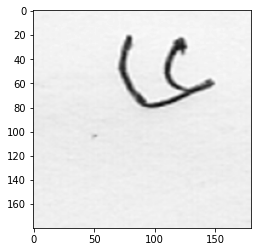

In [4]:
img_url = r"/home/shoaib/Programming/Project/data/training-d/d00013.png"
imgW = cv2.imread(img_url,cv2.IMREAD_GRAYSCALE)
plt.imshow(imgW,cmap=plt.get_cmap('gray'))

In [5]:
def filter(img):
    img = cv2.resize(img,(32,32)) # resize
    img_guass = cv2.GaussianBlur(img,(9,9),10)
    img_w = cv2.addWeighted(img,1.5,img_guass,-0.5,0,img)
    kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    img = cv2.filter2D(img_w,-1,kernel=kernel)
    img = img.reshape(32,32,1).astype('float32')  # change it to float dtype
    img /= 255 # normalize

    return img

**Canvas Image**

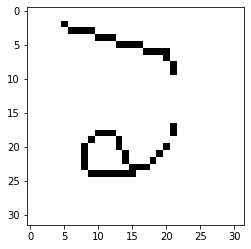

In [6]:
plt.imshow(filter(imgC),cmap=plt.get_cmap('gray'))

**Training Image**

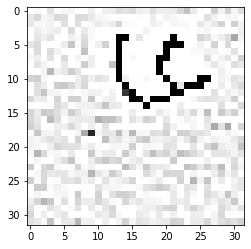

In [7]:
plt.imshow(filter(imgW),cmap=plt.get_cmap('gray'))

**Canvas image size is too big, that's why when it is resized to 32x32 then it is loosing its information.**

# Canvas Image (small canvas size)

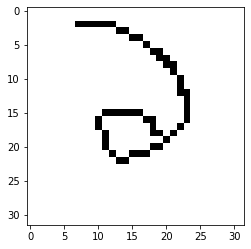

In [8]:
uri2 = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV4AAAFeCAYAAADNK3caAAAAAXNSR0IArs4c6QAAIABJREFUeF7tnQnwV1X5h18IAQEXBAUbRIjYhNgU0TEEbQzSILEmBEMUJAVSwFRQUFBEsTAWiy1lcUPJBYQUrGQRDbJAUmKbYnMjHNBYZJX/vPcvSgTcc793+d733ufMMCi/97znPc9758Pl3HPeU+LgwYMHhQYBCEAAAokRKIHwJsaagSAAAQh4BBBeHgQIQAACCRNAeBMGznAQgAAEEF6eAQhAAAIJE0B4EwbOcBCAAAQQXp4BCEAAAgkTQHgTBs5wEIAABBBengEIQAACCRNAeBMGznAQgAAEEF6eAQhAAAIJE0B4EwbOcBCAAAQQXp4BCEAAAgkTQHgTBs5wEIAABBBengEIQAACCRNAeBMGznAQgAAEEF6eAQhAAAIJE0B4EwbOcBCAAAQQXp4BCEAAAgkTQHgTBs5wEIAABBBengEIQAACCRNAeBMGznAQgAAEEF6eAQhAAAIJE0B4EwbOcBCAAAQQXp4BCEAAAgkTQHhDAJ8xY4asWLFCTj/9dPnkk09k27Ztctppp0nt2rVlzZo1X/7/wYMH/+tnRw55uK32Pbwd+bNj2R7tz4/nd926dbJr1y6pVKmSXH311XLqqaeGIEFXCEAgCAGENwitL2zvvvtuGT58uOzfv7+A3unt0qRJE0+A9ffdu3fLWWedJbVq1ZI2bdogzOlNG5EZJIDwBkxa9+7dZdKkSQF7ZcO8devWngBXrVrV+71ly5Zy+eWXZ2NyzAICCRJAeAPA1n+Wb926NUCP7JuWLl1a+vTpI3fddRdvxdlPNzOMiADC6whS1251DZd2dALly5eX22+/Xbp27So1atQAEwQgcBwCCK/D47Fw4UJp1aqVgyUmSuC6666TwYMHI8A8DhA4BgGE1+HR0F0LH3/8sYMlJocT0DVhFWD9nQYBCHxFAOF1eBpOOOGEzO1gcJh2ZCa69PCTn/xEhg4dGplPHEHAMgGE1yF7un6pe15p4QiUKlXK+xB3//33S9myZcM5ozcEDBNAeB2S165dO5k9e7aDJSYuBMqVKye33HKL9OrVy9srTINA3gggvI4ZL1mypOgJtOO1KlWqiIqKvs3pAQT99fnnn0uJEiW8X/rnugdW7Q61zZs3y0cffeTZHvnzI392uN/DbY/mQ/0fy++nn34qGzduFP1dWzHXr3VftApws2bNHDOBGQTsE0B4A+RQxfNYTbeaWT52q0ee3377be/o85w5c2TJkiWyfv167y+bQwIdAFVg0/bt20vPnj2lbdu2gfvSAQLWCCC8ATNWt25dWbt2rSdIKsRaW2H16tUBvdgzPyTKU6ZMkT/+8Y/y/vvvxzKJBg0aSKdOnWTgwIGx+McpBNJAAOFNQxYMxqBvw0OGDJGpU6fGEr3uJOnWrZuMHz8+Fv84hUAxCSC8xaSfgbFVgPUteNSoUbEsSdSpU0cmTJjAXuAMPCtM4SsCCC9PQyQEdG34kABv2LAhEp+HO+E0XORIcVhEAghvEeFndWgV4H79+nkf6qJs+vGyb9++3l5gyx8yo2SCL5sEEF6beTMRtdYsnjhxomjR9SibnoTT9WUtyEODgEUCCK/FrBmL+a233pKxY8d6SxFRNmpBREkTX0kSQHiTpJ3zsfRD3Lhx4zwR3rFjR2Q0WP+NDCWOEiKA8CYEmmG+IrBz584vBTiqZYgKFSrIj370Ixk5ciTrvzxsqSeA8KY+RdkOUPcB33bbbZEdW9ZCPL/4xS+8j3s0CKSVAMKb1szkLC69QHT06NGyffv2SGbeokUL7+gzux8iwYmTiAkgvBEDxV04ArpbIarDGCq6kydPliuvvDJcUPSGQMQEEN6IgeIuPAHd/6v7daM6jqzCqwLM22/43OAhGgIIbzQc8RIDAS3MowK8YMGC0N55+w2NEAcREkB4I4SJq3gIzJgxwxPgKI4i8/YbT47wGowAwhuMF9ZFJBDV+i9vv0VMIkN7BBBeHgRTBKJc/23ZsqW89NJLrP2aegKyESzCm4085m4Wuv6rt1XotUdhm+75/dWvfhXWDf0h4EwA4XVGhWEaCeiNxfprz549ocLTC0317ZcGgSQIILxJUGaMWAno8oPWa5g5c2aocfTIsW470+PHNAjESQDhjZMuvhMloLsfVIDDXM7ZsGFDT3zPO++8RGNnsHwRQHjzle/MzzaKt1+t96AlLK+55prM82KCxSGA8BaHO6PGTCCKt99BgwbJ0KFDY44U93kkgPDmMes5mXMUb7+s++bkYUl4mghvwsAZLnkC+vbbsWNH2bt3b0GD16xZU6ZPn866b0H06HQ0Aggvz0UuCOjb77e+9S157733CppviRIlvGPL7PctCB+djiCA8PJI5IrA9ddfH+rutyZNmsi8efM47Zarpyb6ySK80TPFY8oJ6LKBbjv77LPPCor0lFNO8cSbOr8F4aMTtRp4BvJKYPny5aJvv8uWLSsYAZXOCkaX+4688eb+EcgvAD1mrOI7bdq0giFQ6axgdLnuiPDmOv1MXgncd999Mnjw4FAwePsNhS93nRHe3KWcCR+NgK77du3aVXbv3l0wIN5+C0aXu44Ib+5SzoSPRUDXfS+77DLZsmVLKEgXX3yxV7CHO95CYcx0Z4Q30+llckEJ6Lpv/fr1Zd26dUG7/pd9yZIlpU+fPuz7DUUxu50R3uzmlpmFIDBw4EAZMWJEwafdDg3dpUsXefzxx0NEQtcsEkB4s5hV5hQJgShqPWggv/nNb6RXr16RxISTbBBAeLORR2YRI4EoKp0hvjEmyKBrhNdg0gg5eQJRvP0ivsnnLa0jIrxpzQxxpZJA2LffO++8Ux544IFUzo2gkiOA8CbHmpEyQiDs26+elps0aVJGaDCNQgggvIVQow8ERCRMnd+nnnpKOnfuDMecEkB4c5p4ph0NAX37Peecc+TDDz8M5LBcuXLyxhtviJaZpOWPAMKbv5wz4xgI6Gm1119/PZBnPdmmtX0R30DYMmGM8GYijUwiDQSuuuoqefHFFwOFouKrpSlr1KgRqB/GtgkgvLbzR/QpI9C2bVuZO3duoKi41SIQrkwYI7yZSCOTSBMBrfWwatWqQCEhvoFwmTdGeM2nkAmkjYB+cNObifX3IE3FN8yNGEHGwra4BBDe4vJn9IwSUNFt1qxZ4Cpnehfc5MmTM0qFaR0igPDyLEAgJgIqvq1btxat8xukIb5BaNm0RXht5o2ojRB4++23PfH99NNPA0WstXxHjRoVqA/GdgggvHZyRaRGCRQqvj169JCJEycanTVhH48AwsvzAYEECBQqvr1795Zf//rXCUTIEEkSQHiTpM1YuSYwZcoU7zr5IK1EiRKiot2oUaMg3bBNOQGEN+UJIrxsEShEfLUWxIoVK7IFIuezQXhz/gAw/eQJFCK+t956qzz88MPJB8uIsRBAeGPBilMIHJ+AbhmbOnWqMyZdcti4caNUq1bNuQ+G6SWA8KY3N0SWcQLt27eXWbNmOc/yoosukkWLFjnbY5heAghvenNDZDkgUKdOHVm7dq3zTLWMpO4LptkmgPDazh/RGyegByuqVKkie/bscZqJlo9ct26dky1G6SWA8KY3N0SWEwJBP7YNHjxYhgwZkhM62ZwmwpvNvDIrYwSCLDlQPN1Yco8SLsJrP4fMIAMEtKDOGWecIfv27XOazZVXXhn4tgsnxxglQgDhTQQzg0DAn4AWxenXr5+/4RcWes2QCjDNHgGE117OiDjDBLQYumsZSf3QpoXTdemBZosAwmsrX0SbcQLz58+XSy65xHmWfGhzRpUqQ4Q3VekgGAiI9O3bV0aPHu2MQreXcUuxM65UGCK8qUgDQUDgKwL6oU2F1LV4uh6o0IMVNDsEEF47uSLSHBEIurdX72nT+g80GwQQXht5IsocEtA32QULFjjNXD+w6ZIDH9qccBXdCOEtegoIAAJHJ6AF0Js2beqMh3vanFEV3RDhLXoKCAACxyagR4PvvfdeZ0S6vUy3pNHSTQDhTXd+iC7nBPRDmwrphg0bnEjUrVtXVq1a5WSLUfEIILzFY8/IEHAiMGPGDOnQoYOTrRp169ZNHnvsMWd7DJMngPAmz5wRIRCYQJAPbSVLlpQDBw4EHoMOyRFAeJNjzUgQKJjA+vXrvSUH1729N998s4wZM6bg8egYLwGEN16+eIdAZASCfGhr3Lixdy08LZ0EEN505oWoIHBUAlo6csuWLb50ypUrJzt37vS1w6A4BBDe4nBnVAgURODRRx+VHj16OPXlfjYnTEUxQniLgp1BIVA4gZNOOkl27Njh64ADFb6IimaA8BYNPQNDoDACrtXLuBizML5J9EJ4k6DMGBCIkECQfb2UjIwQfISuEN4IYeIKAkkR0GI4LlvLRo4c6dX3paWLAMKbrnwQDQScCOhdazNnzvS15QixL6KiGCC8RcHOoBAIRyBIvd6FCxdKy5Ytww1I70gJILyR4sQZBJIhoMVzKlas6DRYhQoVZNOmTdTqdaKVjBHCmwxnRoFA5ASqVq0qmzdvdvKrx411Xy+F0p1wxW6E8MaOmAEgEA+B7t27y6RJk5yd69VAekUQrfgEEN7i54AIIFAQgUWLFgVeu73xxhtl/PjxBY1Hp+gIILzRscQTBBInoFcDBS2GM2DAAHnwwQcTj5UBvyKA8PI0QMAwAf3IVqtWLdm6davzLEqVKiX79u1ztscwegIIb/RM8QiBRAmo+FarVi1QNbL+/fvL8OHDE42TwXjj5RmAQKYI6HKD3lLhcppNJ968eXP5y1/+kikGlibDG6+lbBErBI5DIMihisqVKzvV9QV4PAQQ3ni44hUCRSFw0003yYQJE5zGpoCOE6ZYjBDeWLDiFALFI1CmTBnZu3evbwC6p1f39tKSJ4DwJs+cESEQKwHXAjpdu3YVXZ6gJU8A4U2eOSNCIFYCo0aNkn79+vmOofe3uR459nWGQSACCG8gXBhDIP0EdIeDHqxwaazzulCK3gbhjZ4pHiFQdALly5eXXbt2+cbBfl5fRLEYILyxYMUpBIpLoF69erJ69WrfIBo3bhz4yLGvUwx8CSC8vogwgIA9Aq6Vy0488USnN2N7BNIdMcKb7vwQHQQKIvDyyy/LFVdc4dR32bJlovV6ackRQHiTY81IEEiUwMknnyzbt2/3HXPw4MEyZMgQXzsMoiOA8EbHEk8QSBUBPRwxdepU35i4ENMXUeQGCG/kSHEIgXQQmDFjhnTo0MEpmG3btnEtkBOpaIwQ3mg44gUCqSMQ5ELMoUOHyqBBg1I3h6wGhPBmNbPMCwIiUqNGDdmwYYMvi1atWsn8+fN97TCIhgDCGw1HvEAglQTatm0rc+fO9Y1NT7otXbrU1w6DaAggvNFwxAsEUkngmWeekU6dOvnGdtFFF4lenklLhgDCmwxnRoFAUQgEqdtw8ODBosSYx0ER3jxmnTnnikCJEiWc5svOBidMkRghvJFgxAkE0kvA9QPbvHnzvHvbaPETQHjjZ8wIECgqgYYNG8qKFSt8Y7j55ptlzJgxvnYYhCeA8IZniAcIpJrABRdcIEuWLPGNkS1lvogiM0B4I0OJIwikk4DrVUBsKUsufwhvcqwZCQJFITB79mxp166d79gtWrSQxYsX+9phEJ4AwhueIR4gkGoCbClLX3oQ3vTlhIggEDkBtpRFjjSUQ4Q3FD46Q8AGgbPPPls2btzoG+wrr7wiesyYFi8BhDdevniHQCoI1K9fX1atWuUby09/+lOZMGGCrx0G4QggvOH40RsCJghceOGFTh/O9ACFHqSgxUsA4Y2XL94hkAoCrlvKfvCDH4gWUKfFSwDhjZcv3iGQCgJ33nmnDB8+3DeWvn37ysiRI33tMAhHAOENx4/eEDBB4N5773W60FIvvdTLL2nxEkB44+WLdwikggDCm4o0fBkEwpuufBANBGIhoPepDRs2zNf3wIED5f777/e1wyAcAYQ3HL/M9B43bpxs3bpVNm3aJBUrVpTTTjtNtDC21mjdsWOHVKhQwfuz2rVry5o1a7xqV7opv0GDBt6fadM/V/vD7Y73/4fDO7LvoZ+tW7dOdu3aJdWrV5cuXbpkhnfSE/nhD38oL7zwgu+wV111lTz//PO+dhiEI4DwhuNnsveUKVNk4cKF8u9//1veffddp8sQ0zDRE044Qdq3by8jRozwLnGkuRO45JJLnC6zZDuZO9MwlghvGHrG+t50002iortnzx5jkf9vuN/+9rdF3+L0KzzNn8D3vvc9mTNnjq+hnlrT02u0eAkgvPHyTYX322+/XR599FH55JNPUhFPlEF87Wtfk8suu0z0LxXdg0o7OoFevXqJLif5tZ49e8rYsWP9zPh5SAIIb0iAae7eu3dvmThxouzfvz/NYUYWm65DN2/eXNq0aSP9+/ePzG8WHLGrIV1ZRHjTlY/IotHrut98883I/FlzVKZMGdG3Nw4D/H/mEN50PcEIb7ryEUk0rle9RDJYyp1UrlxZtPCLy1aqlE8lVHhsJwuFL/LOCG/kSIvrsHPnzjJt2rTiBpHC0XVHhN7C8PDDD+dyRwTbydL1UCK86cpHqGjef/99qVatWigfeeisV9x06NAhV+vAbCdL15ON8KYrH6GiOffcc2Xp0qWhfOSps74F33HHHbk4qcV2snQ92QhvuvJRcDR6GKJq1areabNC28knn+ydRtMPU/q7/tq7d6+3K6JUqVJyyimnSNmyZb0Tbtu3b/eGOemkk+Qb3/iG998fffSR7N6927PRX/rfx/p/jbVKlSpev82bN/9X30M/+/jjj71bE1xuTih0ztrv+9//vsyaNSuMi9T3ZTtZulKE8KYrHwVHc+ONN3pbx4I0XZbQtb/rrrtOmjRpEqRrora6/1gPftxzzz1fCn7UAeix51dffTWz67+33Xabt77t17R85AMPPOBnxs9DEkB4QwJMS/eWLVvKokWLnMIpXbq0PPfcc05Xfjs5TNBo1KhR3l8wa9eujWV/cvfu3b0jyaeeemqCs4p/qKZNm4reNuzXqNXgRyianyO80XAsupdGjRrJO++84xtHyZIl5cCBA752Fgz0pgT99fTTT8u+ffsiC1lPww0dOlT07S8LbebMmaI3ULi0Vq1aOdV0cPGFzbEJILwZeTpcP6zpksKyZcsyMuuvpqHlDB9//HF57733IpvbpZdeKn/6058i81csR+ecc46sXLnSaXiu/nHCFNoI4Q2NMB0OGjduLH//+999g9E34+XLl/vaWTXQj2T6ISkqAb7mmmvkySeftIpD9C+kIGu2zz77rPz4xz82O18rgSO8VjLlE6fWKPjrX//qO5vzzjtP3nrrLV876wYPPfSQTJo0yasRHLbpmu/Pf/7zsG4S76/Pgz4Xrq1OnTqyevVqV3PsQhBAeEPAS1PX7373u/KHP/zBNySt5KVf7/PSDu2I0AptYYoF6c6PyZMnm8Kmy0qu/7rRD65aBP+MM84wNUerwSK8VjN3RNzf+c535LXXXvOdTVbWLX0nehSDr3/96/Lhhx8W0tXro4WHXHeOFDxIRB2vvfZaeeKJJ5y9jR8/XnRLIi0ZAghvMpxjH4UjoW6Idc3zkUceKXg/sB43Xrx4sdtgRbL6xz/+IQ0bNnQ+TKNlNF2KpBdpOpkcFuHNSFpZanBPpC4/6H5gLZVYSNOPT/oRKq2tXr16gdZq9Zi57vOlJUcA4U2OdawjsdQQHO/69eulfv363rHmoC2tux2GDBkS6C+Uu+++W+67776g08c+JAGENyTAtHRnqaHwTOgHpS1btgR2kLYPbnoyLcib65lnnikffPBB4HnTITwBhDc8w1R4oPpUuDS47oM+chQVLhWwYjddPtG/fF2OBR+K9ZlnnpGOHTsWO/Rcjo/wZiTtPXr08C609Gs33HCD/Pa3v/Uzy+XPC9n10K1bN3nssceKzktvWx49erRzHA0aNJB3333X2R7DaAkgvNHyLJo3LW7y4osv+o6vBcBfeOEFX7u8GpQrV04+++wz5+nrGrHuIihmmz9/vve269p0jlo0P2uFgFznnwY7hDcNWYggBtZ4I4D4hYsTTzzR+YOb1iL+5z//Gd3gAT3pEkPNmjVFf3dt8+bNk9atW7uaYxcDAYQ3BqjFcMkab7TUtfC7SxU3reMbxbHkQqPXI+B/+9vfnLsPHjxYdOcDrbgEEN7i8o9s9LZt28rcuXN9/embscsJN19HGTdwFTStCudSIyMOXEGL3+sHxCAf3+KIGZ//TwDhzciToP90XLBgge9s6tatK6tWrfK1y7tBrVq15F//+pcvBr23Ta9HSrqNHTtWevfu7TysXtuka8FpvmnEeTIZMER4M5BEnYLuVnD9ur5t2zY+rPjkXQXVtajO+eefL0uWLEnsSQoquhrYyJEjRXc+0NJBAOFNRx5CRzF9+nTnPZlaZUs3/9OOTUBvofj888+dEelVRN/85jed7Qs1LER0uVWiUNrx9UN442ObuGe98XfHjh2+4+rpJq6BPz6mIG+86qlSpUqityLH2QoRXb3tWSuysXUszswE943wBmeW2h5BNtHrPk49MEA7OgF9S1y4cGEgPLomrFu74miFiK7GoTcL33rrrXGEhM8QBBDeEPDS1jXIWf277rpLhg0blrYppCqeEiVKBIrn7LPPFi28E3UrVHR16UOXQGjpI4Dwpi8noSKqWLGi02Z63QWhG+lpxycQVHz1n/VVq1aNDGuholu9enXZsGFDZHHgKFoCCG+0PIvu7cILL3Qq1K3XfbscMS76hFIQQBDxbdasWaADDcebXqGim+dbRlLwuDiFgPA6YbJj1K9fP6/It18bMGCAPPjgg35m/FzEu6VXb65wbZs3bw59d5lrHo+MiVocrlkqrh3CW1z+kY+utyq4HAlVGz0+SnMjoLsD9uzZ42R8/fXXezccF9q04lkhF2siuoUST74fwps881hHRHjjwfvkk09Kly5dnJzr0kSQPcCHO+3cubNMmzbNaZzDjRDdwMiK2gHhLSr+6AfXtduZM2f6OtYC2FoIm+ZOIEjVskJ2jeihlqlTp7oH9IUlohsYWdE7ILxFT0G0AbjWbLBwW260ZMJ7C7K3N8hbbyG3RxyaDaIbPq/F8IDwFoN6jGO6FkRnj2fwJPzud78TvWHYpbkKL6LrQjN7NghvxnKqhXK0YI5LO3jwoIsZNocRKFmypLhwcxFePfCiZTqDFDE/FEqbNm1kzpw55MYoAYTXaOKOF7brvtNly5ZRJjBg/l2vBtL14F27dh3Tu4puy5YtnWprHOmkXr16snLlyoCRY54mAghvmrIRUSxaL8Dl6Gr37t2dLsiMKKzMuHH5i+14b8W33HKLPPLIIwXx0Ny61AkuyDmdEiOA8CaGOrmBtNj18uXLfQfkRgJfRMc0OJ74Hkt09S9D3ZK2aNGiggbmRFpB2FLZCeFNZVrCBeW6F7RChQqyffv2cIPluPeR673HW9fV04S6x7qQ9VxFTCHzbD1oCG+28unN5vXXX5eLL77YaWb6ZtyoUSMnW4yCE9C1XD3+q9fuFNooXF8oufT2Q3jTm5tQkZUuXVr27dvn66N///4yfPhwXzsMghPQY9n6llto03vSZsyYwVXshQJMcT+EN8XJCROafvlevXq1rwstYailDGnREdC3W63X4PKB81ijcjlldPlIoyeEN41ZiSAm3bHgWqhl3bp1UqNGjQhGzbcLXb/92c9+Jk899VQoEA0bNpRZs2aRk1AU090Z4U13fgqOTr+c6z5Rl9anTx+nUpIuvvJqc99993nLCoUWxznErXLlyt6tEdyRlu0nCeHNcH5PP/10pwsY9W1X33ppwQnoskLXrl1l48aNwTsf0aN+/fry5ptvIrqhSabfAcKb/hwVHOGUKVO8tUaXprdRaGUzmhuBKHYrHBqpTJkyMmjQIO8XLR8EEN4M51nXHPUONpemNQNee+01F9Nc2+gHM11S0L/Uomi6zKO7H1haiIKmHR8Ir51cFRRpkBqv27ZtQwCOQVn/Ehs9erTT7R4uidIbiVW8tYwnLX8EEN6M51z3gWrNVpfGnt6jU9IdIs8++6zs3LnTBaOvjV655HI9k68jDMwSQHjNps49cP1n7KeffurboW7durJq1SpfuzwY7N6921tz1bfc/fv3RzJlLaSuR4e1lgYt3wQQ3hzkv127djJ79mynmeZ9uWHTpk2i16qPGTPmuGUdnWB+YaQfz/R0YN++fYN0wzbDBBDeDCf30NRefvllueKKK5xmmte6AEuXLvUEVwvJR9nOOussWbhwIYchooSaAV8IbwaS6DIF1+UG/WewFkjPS9NbHMaNGycvvfRSpFPWI7+6jstbbqRYM+MM4c1MKo8/kZ49e8r48eOdZqv/3K5WrZqTrVWjYcOGedeor1ixItIp6G4FFVzdTUKDwLEIILw5eTZ0w3/Tpk2dZquioUsOWWu6w0Pr2upx6rBHe49ko2+4+narv9iTm7UnJ/r5ILzRM02tR9flBv0YtGXLFjnppJNSOxfXwFRoX331VXnjjTdiK/rOIQjXbGB3iADCm6NnQYuja5F0l6b/XNb9plbbgAEDvLfbvXv3xjYFrdGgnKjsFhvizDpGeDOb2v+d2CuvvCKXX36504z1ltzNmzebe+vVojV644MurcTVtPjQ9OnTOXUWF+Ac+EV4c5Dkw6dYp04dr+ygS6tdu7b8+c9/lkqVKrmYF9Um6hoKR5uMstOiQ/o2TYNAGAIIbxh6BvsuWbJELrjggkCR644I3eOaxqY1FPQN97nnnpMdO3bEEqJ+bOzVq5c0b948Fv84zR8BhDd/OZeOHTt6/1QO0q699lqZOnVqkC6R26rIPv/8894ygta/1auNXK43KiQQvYFZxVb/0mENtxCC9DkeAYQ3h89HIW+9iumdd94RvZYmzqan7FRYdS9x2bJlvf9WwY1zzfbw+dSsWfNLwS1fvnycU8V3jgkgvDlNvu40qHP7AAAGb0lEQVTpDSpmZ555pnzwwQeRE9P12Yceesi7Iy7OXQjHC1wv/dR6CrpTgQaBuAkgvHETTqn/J554QnT5IGgrWbKkV2ZyxIgRof4JrqL/+9//XvTIrh5oKEYrVaqU1KpVy7ugUn/RIJAUAYQ3KdIpHCfIDoejhd+iRQu59NJL5fzzz/d2SmzdutUz0/VRfYvVY8eHLxPon4W58jwKhKVLl5ZOnTp51xxx1VEURPFRCAGEtxBqGepTvXp1bz01601P4d1xxx3ca5b1RBuZH8JrJFFxhqnbsbT+bNT1C+KM2dU3VcJcSWGXJAGEN0naKR5r5cqV0rhxY9m3b1+KowwWGjUUgvHCOjkCCG9yrFM/0i9/+Uvvn+PWW5UqVWTx4sWhPv5ZZ0D86SaA8KY7P4lHF/aDW+IBfzGgVl7TO+O0LOPVV19drDAYFwJOBBBeJ0z5MkrzBzd9m92zZ4/3Nqvb2tq3b8/lkfl6PDMxW4Q3E2mMfhL33HOPV1YxrvoHfhHXr1/f26amW770bVavJKLAuB81fm6FAMJrJVNFivPQibI1a9bEHoHu/x06dKh3bQ4iGztuBigiAYS3iPAtDa0HIaZMmeLtg925c2fo0LUOgoqr+tK12RtuuMH7RYNAHgggvHnIcsRz1Lfgp59+2qvboPtktZjNrl275D//+Y+3F/jAgQOidR3OPfdc0Zq+hy8TtG7dOuJocAcBewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBNAeI0nkPAhAAF7BBBeezkjYghAwDgBhNd4AgkfAhCwRwDhtZczIoYABIwTQHiNJ5DwIQABewQQXns5I2IIQMA4AYTXeAIJHwIQsEcA4bWXMyKGAASME0B4jSeQ8CEAAXsEEF57OSNiCEDAOAGE13gCCR8CELBHAOG1lzMihgAEjBP4P+zi08gRNUhwAAAAAElFTkSuQmCC"

imgCn = uri_to_img(uri2)

plt.imshow(filter(imgCn),cmap=plt.get_cmap('gray'))

**Here we can see when the canvas image size (canvas size) is small, in that case if we resize the image to 32x32
then it is not lossing information as before**